In [1]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
from gurobipy import GRB
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from utils import *

## Master problem correctness

In [98]:
file_name = "test11_1"

In [30]:
# test 13
n = 200
K = 5
seed = 5
l = 4
alpha = 0.51
beta = [1, 1, 1, 1]
lower = 5
upper = n
M = 1e3
np.random.seed(seed)

groups = [0,1,2,3]
p = [0.2,0.2,0.2,0.4]
labels = np.random.choice(groups, p=p, size=n)


X, Y, archetype = synthetic_data(n, K, seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(
    X, K, l, alpha, beta, n, labels, M, lower, upper)

Optimizing Cluster Centers:   0%|          | 0/300 [00:00<?, ?it/s]

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 4795.10it/s, Status=SUCCESS]


In [99]:
#test 11
n = 200
K = 5
seed = 7
l = 3
alpha = 0.51
beta = [1, 1, 2]
lower = 5
upper = n
M = 1e3
np.random.seed(seed)

groups = [0,1,2]
p = [0.25,0.15,0.6]
labels = np.random.choice(groups, p=p, size=n)

X, Y, archetype = synthetic_data(n, K, seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 3788.74it/s, Status=SUCCESS]


In [33]:
#test 12
n = 300
K = 6
seed = 10
l = 4
alpha = 0.51
beta = [1, 1, 1, 1]
lower = 5
upper = n
M = 1e3
np.random.seed(seed)

groups = [0,1,2,3]
p = [0.2,0.2,0.5,0.1]
labels = np.random.choice(groups, p=p, size=n)

X, Y, archetype = synthetic_data(n, K, seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 4248.83it/s, Status=SUCCESS]


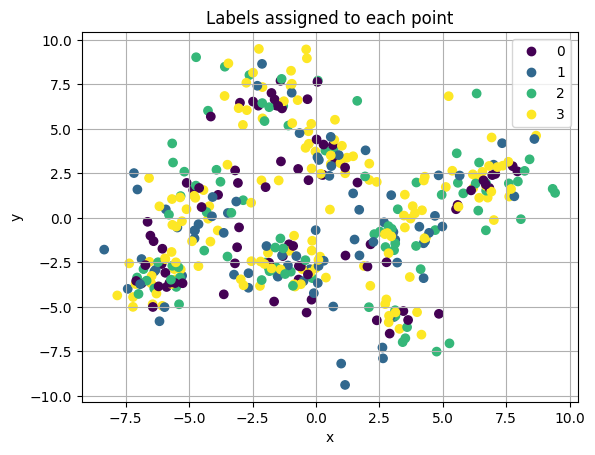

In [7]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3])
plt.show()

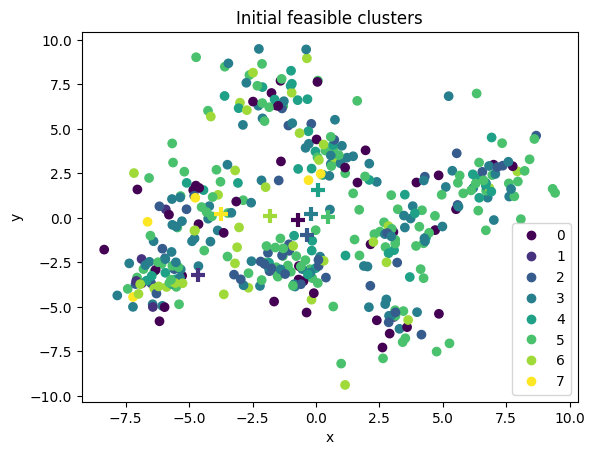

In [10]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4,5,6,7], s=100, linewidth=3)
plt.show()

In [11]:
pt = 1
(xc,yc) = (-1.744270101129342, 1.1794268573010105)
print(((X[pt][0] - xc) ** 2 + (X[pt][1] - yc) ** 2) ** 0.5)

8.274196594151562


In [50]:
old_dist_1 = [0.0, 7.707825939892317, 5.493892999494312, 4.523587051693442, 5.5300275452361305, 4.547665587119241, 6.817068876820428, 6.120203013768313, 6.147022195051055, 7.110347346803836, 5.678738236876461, 5.33291262755057, 6.809000572513938, 6.702686682772461, 7.128994171415653, 5.485685677787011, 6.42420577892201, 7.038789677345225, 5.696183641054587, 8.045320620285912, 0.16325638587582536, 6.334531159553402, 4.557942119103139, 5.782560030748108, 6.230420896559995, 5.1330283692380005, 0.0, 0.16325638587582536, 3.934890794503483, 0.16325638587582536, 3.3667372015852766, 4.22091061973528, 0.16325638587582536, 0.0, 0.16325638587582536, 3.2787878002035447, 0.0, 0.16325638587582536, 0.16325638587582536, 4.237707841848454, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 4.087260783240241, 0.16325638587582536, 0.16325638587582536, 3.822188119766786, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 6.34633466087771, 4.701152787483532, 5.815586407683742, 4.576458125228537, 3.697417704140641, 4.2570271841767875, 5.4650231529565705, 0.16325638587582536, 3.7958621354450477, 5.836446904190667, 4.45506488430009, 7.340092619829911, 0.16325638587582536, 0.16325638587582536, 3.264713645258979, 5.308424626755676, 5.8748989904515, 3.8177402021703255, 3.922196883045498, 6.03395321389405, 4.595429906380295, 0.16325638587582536, 4.482078118495322, 5.844716909730312, 0.16325638587582536, 5.621939349721949, 4.892831189718284, 0.16325638587582536, 4.65270549143287, 5.767585255238856, 4.411988340941775, 6.800862349800263, 0.16325638587582536, 4.143706219161011, 4.248074813478417, 5.611710149196985, 3.8285039415337447, 4.50560694589121, 6.390193846643549, 5.8165272968166, 3.4397172714124404, 0.16325638587582536, 4.537747308474167, 0.0, 0.16325638587582536, 3.480179639918523, 0.16325638587582536, 0.16325638587582536, 3.6392093531745773, 0.16325638587582536, 4.174237019244349, 3.6968660010583014, 0.16325638587582536, 0.16325638587582536, 3.619657330836385, 3.9111137416059463, 3.495416066482991, 0.16325638587582536, 4.236870855199206, 3.6865617267848014, 3.6232341636505305, 0.16325638587582536, 0.16325638587582536, 3.4944891245299043, 0.16325638587582536, 3.487787952369162, 0.16325638587582536, 3.471141472611814, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 3.2706354141181215, 0.16325638587582536, 0.16325638587582536, 3.9250562026955986, 3.9637498414976893, 3.9637843787448483, 3.61104164421374, 4.5561986877956535, 4.090802119733482, 4.298343121591031, 3.5988059052308405, 0.16325638587582536, 0.16325638587582536, 4.100890505432303, 3.2473282573522257, 0.16325638587582536, 3.380344693256891, 4.236820771784612, 3.965102161691444, 3.924645290516245, 3.467156239591479, 5.117876734258717, 0.16325638587582536, 6.925550887572527, 0.16325638587582536, 0.0, 3.6767165866296083, 3.2643224996985465, 5.008294061627813, 5.314243767271086, 4.173595406421376, 3.9123348611779245, 3.4729968533854003, 4.788173354121772, 5.24826332498338, 4.635264070201489, 4.400903584363258, 4.43200958053962, 5.232069279250577, 0.16325638587582536, 3.5078338993349107, 3.713291783994158, 4.214044578680281, 5.127719366653527, 5.32851799253387, 0.16325638587582536, 5.297913787275289, 5.169704259624934, 5.390622601555779, 4.050135439791695, 0.16325638587582536, 0.16325638587582536, 4.257786221643821, 4.258692922369958, 4.161002450762813, 3.891819498298042, 4.774869754164202, 5.296589097056413, 3.587795473443507, 4.5257424245169755, 3.434484583496101, 5.540743453074687, 5.651600198349177, 4.354556122728361, 3.244148552046023, 0.16325638587582536, 4.682972654948001, 0.16325638587582536, 3.836924792652387]
old_dist_2 = [0, 7.707825939890159, 5.493892999487558, 4.5235870516872705, 5.53002754524105, 4.547665587112176, 6.817068876819047, 6.120203013768749, 6.147022195047258, 7.110347346793775, 5.678738236871983, 5.3329126275462, 6.809000572507688, 6.702686682776699, 7.128994171410882, 5.485685677774476, 6.4242057789194655, 7.038789677339856, 5.696183641048594, 8.04532062028707, 1.920662624790803, 6.334531159551364, 4.557942119091128, 5.7825600307464065, 6.230420896556228, 5.133028369240734, 0, 1.9280672882954373, 3.934890794506782, 3.034191356351016, 3.366737201581955, 4.220910619737024, 3.130925906570547, 0, 2.6596045499120406, 3.278787800202242, 0, 2.690048168803443, 2.3645333820594754, 4.237707841837354, 1.8709265210485344, 1.1337287321522036, 2.0141469737769855, 2.15064434014506, 1.8271058225943533, 2.92793308425901, 2.9216487557708724, 2.7438478540260425, 2.43061502965234, 3.0032468162466355, 3.1658650021655594, 2.3630054386792425, 2.9559605510531526, 4.087260783234443, 2.201900886629706, 2.30275734083548, 3.822188119761303, 1.9412200175497512, 2.397219061954397, 2.666298406124079, 6.34633466088234, 4.701152787478519, 5.815586407682324, 4.576458125218463, 3.697417704141705, 4.257027184176806, 5.465023152951105, 1.9262319293342063, 3.7958621354446325, 5.83644690417967, 4.455064884289987, 7.340092619825788, 2.541120700607811, 1.9192625653336393, 3.2647136452471015, 5.30842462674623, 5.874898990440681, 3.817740202159932, 3.92219688303129, 6.033953213888267, 4.595429906373552, 3.1427458040568763, 4.482078118495782, 5.844716909726457, 2.2390276826578197, 5.621939349707758, 4.8928311897118295, 2.507751690053686, 4.6527054914237045, 5.767585255233068, 4.4119883409457605, 6.800862349805961, 2.379597994751982, 4.143706219126008, 4.24807481346277, 5.61171014919851, 3.828503941526025, 4.505606945877589, 6.390193846644768, 5.816527296819659, 3.4397172713989868, 2.767748556350492, 4.537747308459973, 0, 3.0924658008747, 3.4801796399399896, 1.6245157703822208, 2.7342341111471664, 3.639209353155226, 2.681850583326203, 4.174237019242908, 3.6968660010555774, 2.1331447291349446, 1.9583946025190553, 3.6196573308305093, 3.9111137416263215, 3.495416066466094, 2.175935535281735, 4.236870855197052, 3.6865617267822746, 3.623234163646917, 3.0372459731072277, 2.267630381628996, 3.4944891245221146, 1.2939566580370276, 3.4877879523635884, 2.5522658936582077, 3.471141472612134, 2.3136410795833187, 2.466547471088452, 2.58560516910043, 3.2706354141048726, 3.118838286757511, 2.8379916594476664, 3.9250562026923665, 3.96374984149847, 3.963784378759817, 3.6110416442322895, 4.5561986878024525, 4.090802119719025, 4.298343121584607, 3.5988059052329993, 2.42939249536456, 1.5456945443085335, 4.100890505436108, 3.247328257378236, 2.3701160388072617, 3.3803446932649104, 4.236820771761447, 3.965102161697117, 3.9246452905050226, 3.4671562395809827, 5.117876734255005, 3.152974046907732, 6.9255508875708305, 2.6990260217061928, 0, 3.676716586628044, 3.264322499678988, 5.008294061618656, 5.314243767260881, 4.173595406402152, 3.912334861151187, 3.4729968534047666, 4.78817335412246, 5.248263324981538, 4.635264070199073, 4.400903584355584, 4.4320095805339905, 5.232069279258973, 2.7787917505422612, 3.5078338993236264, 3.713291783989898, 4.214044578662545, 5.127719366648059, 5.32851799252866, 3.0485266202384818, 5.297913787260932, 5.169704259625023, 5.39062260155394, 4.0501354397791, 2.520598067945896, 2.7468666741520984, 4.257786221628247, 4.25869292235839, 4.161002450751996, 3.8918194982822647, 4.774869754166986, 5.296589097059917, 3.5877954734310697, 4.525742424510465, 3.4344845834743962, 5.540743453078028, 5.6516001983506605, 4.354556122716751, 3.2441485520358877, 2.786413044281187, 4.682972654938831, 3.148491405108796, 3.8369247926568737]
S = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [43]:
for i,j in enumerate(old_dist_1):
    if j == 0.16325638587582536:
        old_dist_1[i] = old_dist_2[i]
        #print("Point =",i,"S[i] =", S[i], "Distance=", j)

In [44]:
dist_gurobi = np.array(old_dist_1)
dist_recalc = np.array(old_dist_2)

In [47]:
np.allclose(dist_gurobi,dist_recalc)

True

In [46]:
np.argmax(dist_recalc - dist_gurobi)

50

In [47]:
dist_gurobi[50], dist_recalc[50]

(0.16325638587582536, 3.1658650021655594)

In [63]:
R = 0.16325638587582536
#R = 3.1658650021655594

In [64]:
cx, cy = (0.08331570474228736, 0.8024171295584471)
LHS =  - 1e+06 *S[50] + 5.699012446678714 * cx - 1.474705464127741 * cy + R ** 2 - cx ** 2 - cy ** 2
RHS = -999991.3366252317
print(LHS)

-1000001.3326737961


Test Pricing Problem

In [116]:
model = gp.read("./tests/model_write/test9_slack4_pricing_out4.mps")

Read MPS format model from file ./tests/model_write/test9_slack4_pricing_out4.mps
Reading time = 0.08 seconds
PricingProblem: 2006 rows, 4006 columns, 14004 nonzeros


In [117]:
model.read("./tests/model_write/test9_slack4_pricing_out4.mst")

Read MIP start from file ./tests/model_write/test9_slack4_pricing_out4.mst


In [29]:
model.reset(1)

Discarded solution information including additional information


In [118]:
model.Params.PoolSearchMode = 2
model.Params.PoolSolutions = 10
model.Params.TimeLimit = 10
model.Params.MIPGap = 0.1

Set parameter PoolSearchMode to value 2
Set parameter TimeLimit to value 10
Set parameter MIPGap to value 0.1


In [119]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2006 rows, 4006 columns and 14004 nonzeros
Model fingerprint: 0x20cdf7aa
Model has 2000 quadratic constraints
Variable types: 2002 continuous, 2004 integer (2004 binary)
Coefficient statistics:
  Matrix range     [4e-01, 1e+10]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [7e-04, 1e+10]
  Objective range  [1e+00, 2e+04]
  Bounds range     [1e+00, 1e+02]
  RHS range        [5e+01, 1e+10]
  QRHS range       [1e+10, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

User MIP start produced solution with objective 15.1825 (0.61s)
User MIP start produced solution with objective -8.16216 (0.67s)
Processing user MIP start: 0 nodes explored in subMIP, total e

Check Reduced Costs

In [93]:
file_name = "test9_slack8"

In [94]:
bounds = np.loadtxt("./tests/model_matrix/"+file_name+"_bounds.txt")
objVals = np.loadtxt("./tests/model_matrix/"+file_name+"_objVals.txt")

In [98]:
bounds_f = []
objVals_f = []

In [100]:
for i in range(len(bounds)):
    if objVals[i] <= 0:
        bounds_f.append(bounds[i])
        objVals_f.append(objVals[i])

In [105]:
bounds_f = np.array(bounds_f)
objVals_f = np.array(objVals_f)

In [107]:
gap = np.array(np.abs(bounds_f-objVals_f) / np.abs(objVals_f))

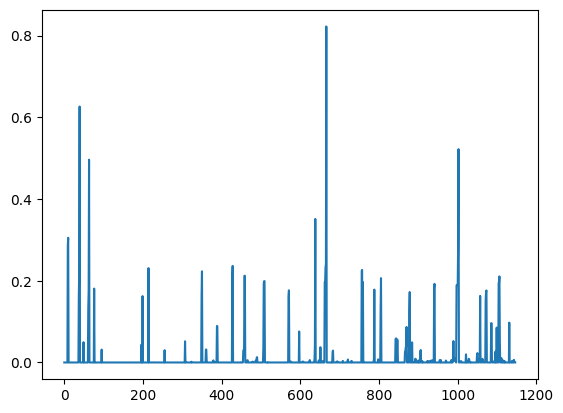

In [108]:
plt.plot(gap)

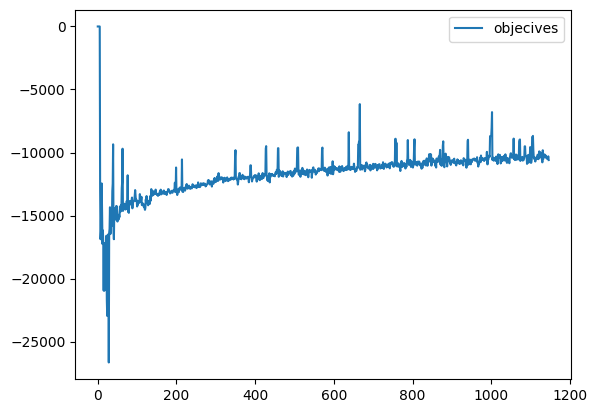

In [110]:
#plt.plot(bounds_f,label="bounds")
plt.plot(objVals_f, label="objecives")
plt.legend()
plt.show()

## Previous Model Test

In [62]:
file_name = "test11_1_recon_last_10"

In [64]:
file_name = "test11_1_slack"

In [53]:
file_name = "test11_1"

In [100]:
model = gp.read("./model_write/" + file_name + "_master_out201.mps")
constrs_len = len(model.getConstrs())
#print(constrs_len)
clusters = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
distances = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
slacks = np.loadtxt("./model_matrix/"+file_name+"_slacks.txt")
solutions = np.loadtxt("./model_matrix/"+file_name+"_solutions.txt")
objectives = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
new_centers = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
new_centers = [(i[0],i[1]) for i in new_centers]

Read MPS format model from file ./model_write/test11_1_master_out201.mps
Reading time = 0.14 seconds
MasterProblem: 204 rows, 1196 columns, 70384 nonzeros


In [85]:
solutions[-1] @ distances[:solutions[-1].shape[0]]

2346.776832134091

In [65]:
clusters.shape

(10018, 203)

In [101]:
clusters = np.concatenate((clusters,np.ones(clusters.shape[0]).reshape(-1,1)),axis=1)
A = [[model.getCoeff(constr, var) for var in model.getVars()] for constr in model.getConstrs()]
b = [constr.rhs for constr in model.getConstrs()]
c = [var.obj for var in model.getVars()]
induced_mat = np.concatenate((clusters[:K,:],np.eye(constrs_len-1,constrs_len),clusters[K:,:]),axis=0).T
A = np.array(A)

In [102]:
A2 = A

In [103]:
additional_cluster_in_the_last_round = induced_mat.shape[1] - A.shape[1]
print(additional_cluster_in_the_last_round)

8984


Compare the linear system of constraints from the last iteration of Gurobi with the cluster representations

In [44]:
induced_mat[:,:A.shape[1]] - A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
np.allclose(induced_mat[:,:A.shape[1]],A)

False

In [11]:
dist_gurobi = np.array(c[:K] + c[K + constrs_len-1:])
dist_stored = np.array(distances)[:dist_gurobi.shape[0]]

Compare the coefficients of variables in the objective from the last iteration of Gurobi with the cluster representations

In [12]:
print(dist_stored)

[3409.05438148   68.29650393   17.20620399 ...  415.07182549  427.42892999
  427.84431451]


In [14]:
np.allclose(dist_gurobi,dist_stored)

True

## Reconstruct problem from model matrix

In [104]:
m = clusters.shape[0] - additional_cluster_in_the_last_round
r = distances.tolist()[:m]
s = clusters[:m,:n].tolist()
new_t = clusters[:m,n:n+l].T.tolist()

In [105]:
m

993

In [ ]:
solve_master_problem_integer(n, m, l, r, s, new_t, beta, K)

In [93]:
#solve_master_problem_integer(n, m, l, r, s, new_t, beta, K)

In [73]:
pricing_prob = gp.read("./model_write/" + file_name + "_pricing_out1001.mps")
pricing_prob.read("./model_write/" + file_name + "_pricing_out1001.mst")

Read MPS format model from file ./model_write/test9_slack11_pricing_out1001.mps
Reading time = 0.04 seconds
PricingProblem: 206 rows, 406 columns, 1404 nonzeros
Read MIP start from file ./model_write/test9_slack11_pricing_out1001.mst


In [50]:
last_model2 = gp.read("model_write/test11_1_master_out2000.mps")

Read MPS format model from file model_write/test11_1_master_out2000.mps
Reading time = 1.15 seconds
MasterProblem: 204 rows, 10175 columns, 907606 nonzeros


In [48]:
last_model = gp.read("model_write/test11_1_slack_recon_last_10_master_out10.mps")

Read MPS format model from file model_write/test11_1_slack_recon_last_10_master_out10.mps
Reading time = 0.60 seconds
MasterProblem: 204 rows, 7042 columns, 494985 nonzeros


In [94]:
#last_model2.optimize()

In [95]:
#last_model.optimize()

In [29]:
last_model = gp.read("model_write/test9_slack12_master_out1.lp")

Read LP format model from file model_write/test9_slack11_recon_last_master_out1.lp
Reading time = 0.19 seconds
: 205 rows, 7163 columns, 453127 nonzeros


In [20]:
last_model = gp.read("model_write/test13_1_slack_recon_last_10_master_out10.mps")

Read MPS format model from file model_write/test13_1_slack_recon_last_10_master_out10.mps
Reading time = 0.34 seconds
MasterProblem: 205 rows, 6971 columns, 478656 nonzeros


In [96]:
#last_model.optimize()

In [106]:
%%capture
main_loop("test11_1_recon_201_1", 1, K, n, m, l, r, beta, s, new_t, alpha, M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (20,100,False))

In [13]:
%%capture
for i in range(100,600,100):
    for j in range(20,70,10):
        filename = "test9_slack11_recon2_"+str(j)+"_"+str(i)
        main_loop(filename, 100, K, n, m, l, r, beta, s, new_t, alpha,
            M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (j,i,True))

In [11]:
%%capture
main_loop("test9_slack11_recon_20_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (20,100,True))
main_loop("test9_slack11_recon_40_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (40,100,True))
main_loop("test9_slack11_recon_60_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (60,100,True))
main_loop("test9_slack11_recon_80_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (80,100,True))

In [17]:
def decompose_objectives(file_name,n,part_coef,rep_coef):
    #print(file_name)
    #clusters1 = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
    distances1 = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
    slacks1 = np.loadtxt("./model_matrix/"+file_name+"_slacks.txt")
    solutions1 = np.loadtxt("./model_matrix/"+file_name+"_solutions.txt")
    objectives1 = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
    #new_centers1 = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
    #new_centers1 = [(i[0],i[1]) for i in new_centers1]
    
    #print("distances",distances1.shape)
    #print("solutions",solutions1.shape)
    
    iters = solutions1.shape[0]
    cluster_pool_size = solutions1.shape[1]
    
    sum_of_distances = np.array([distances1[:cluster_pool_size] @ solutions1[k] for k in range(iters)])
    sum_of_partition_slacks = np.array([sum(slacks1[k,:n]) for k in range(iters)])
    sum_of_rep_slacks = np.array([sum(slacks1[k,n:]) for k in range(iters)])
    
    objectives_recon = sum_of_distances + part_coef * sum_of_partition_slacks + rep_coef * sum_of_rep_slacks
    
    #print(objectives_recon-objectives1)
    
    #assert(False)
    
    assert(np.allclose(objectives_recon, objectives1,  atol=1e-1))
    
    return sum_of_distances,sum_of_partition_slacks,sum_of_rep_slacks,objectives_recon

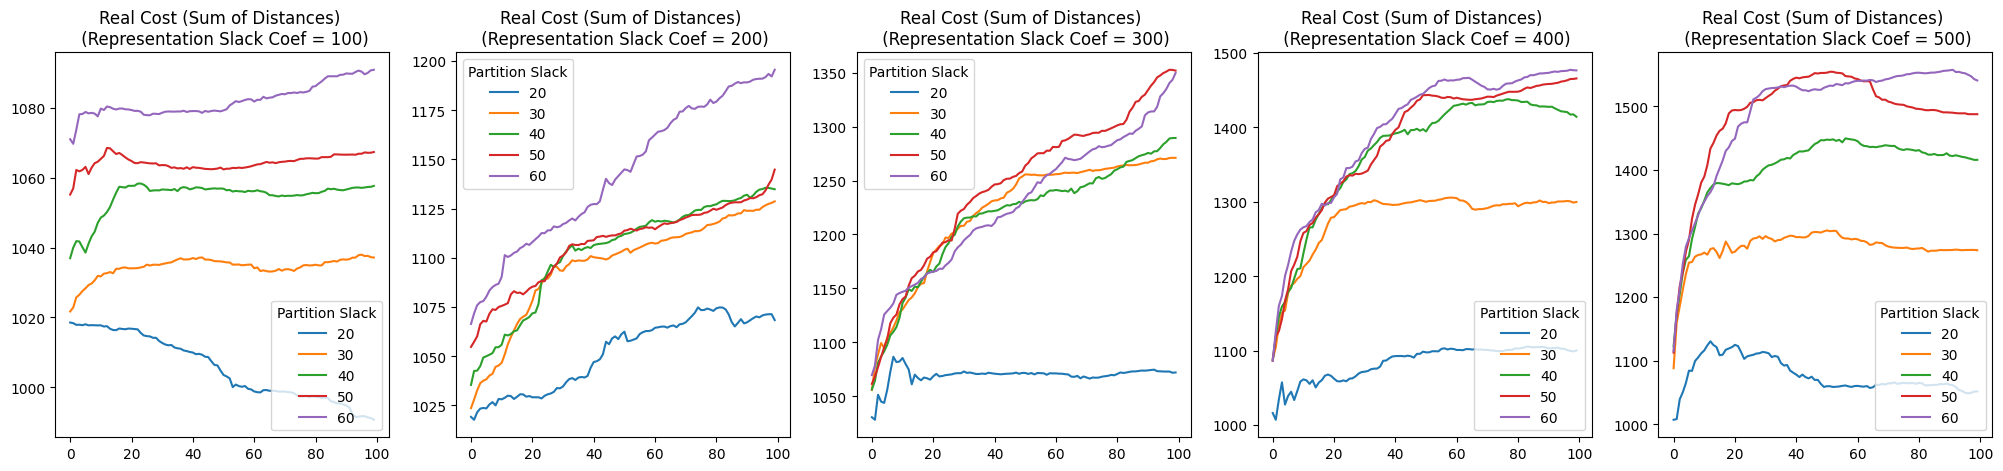

In [20]:
counter = 0
fig, ax = plt.subplots(1, 5, figsize=(25,5))
for i in range(100,600,100): # representation
    for j in range(20,70,10): # partition
        filename = "test9_slack11_recon2_"+str(j)+"_"+str(i)
        try:
            s1,s2,s3,s4 = decompose_objectives(filename,200,j,i)
        except:
            print(i,j)
            continue
        ax[counter].plot(s1, label=str(j))
    ax[counter].set_title("Real Cost (Sum of Distances) \n (Representation Slack Coef = " + str(i) + ")")
    ax[counter].legend(title = "Partition Slack")
    #ax[counter].set_ylim((800,1400))
    counter += 1

plt.show()
    

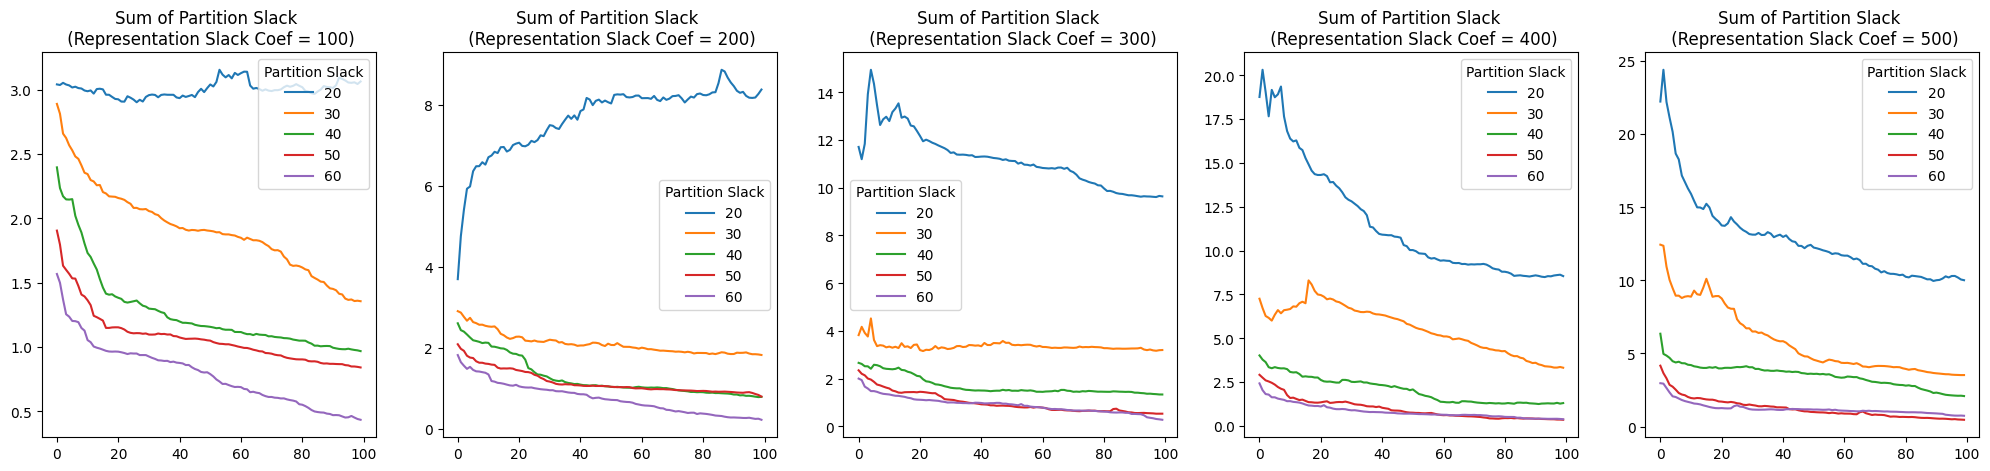

In [21]:
counter = 0
fig, ax = plt.subplots(1, 5, figsize=(25,5))
for i in range(100,600,100): # representation
    for j in range(20,70,10): # partition
        filename = "test9_slack11_recon2_"+str(j)+"_"+str(i)
        try:
            s1,s2,s3,s4 = decompose_objectives(filename,200,j,i)
        except:
            print(i,j)
            continue
        ax[counter].plot(s2, label=str(j))
    ax[counter].set_title("Sum of Partition Slack \n (Representation Slack Coef = " + str(i) + ")")
    ax[counter].legend(title = "Partition Slack")
    #ax[counter].set_ylim((800,1400))
    counter += 1

plt.show()

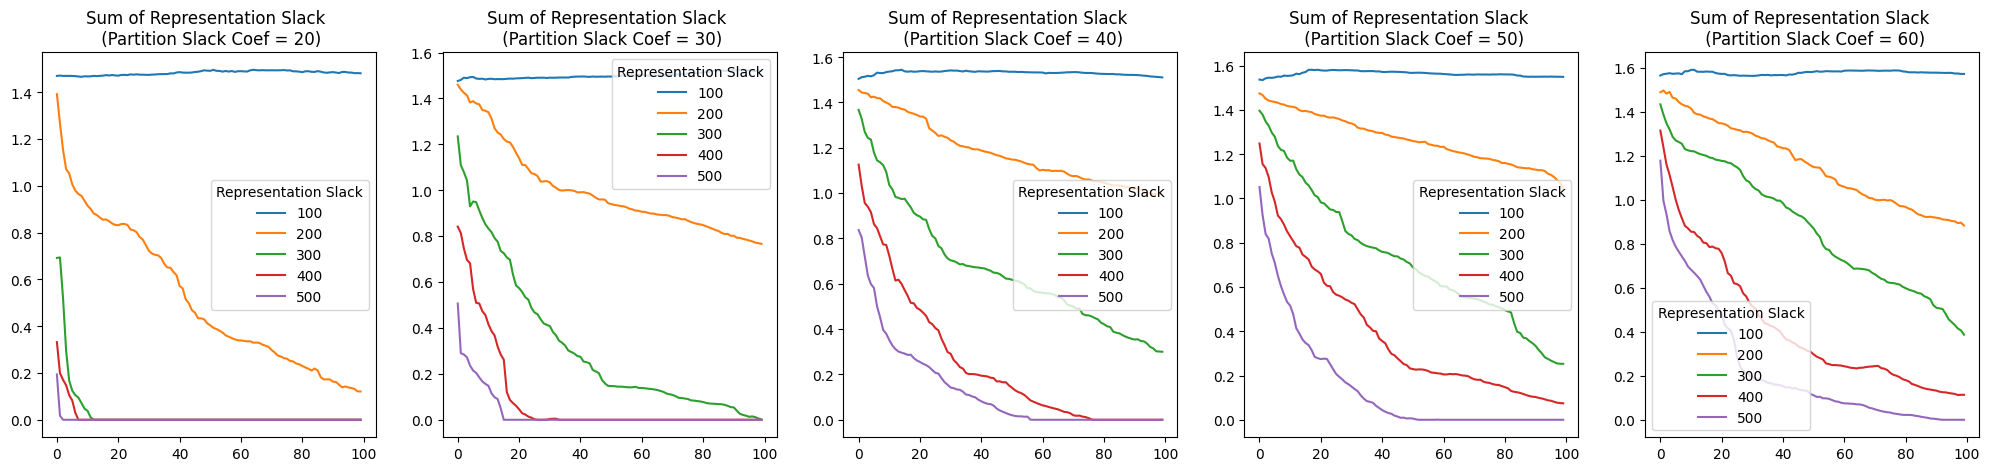

In [22]:
counter = 0
fig, ax = plt.subplots(1, 5, figsize=(25,5))
for j in range(20,70,10): # partition
    for i in range(100,600,100): # representation
        filename = "test9_slack11_recon2_"+str(j)+"_"+str(i)
        try:
            s1,s2,s3,s4 = decompose_objectives(filename,200,j,i)
        except:
            print(i,j)
            continue
        ax[counter].plot(s3, label=str(i))
    ax[counter].set_title("Sum of Representation Slack \n (Partition Slack Coef = " + str(j) + ")")
    ax[counter].legend(title = "Representation Slack")
    #ax[counter].set_ylim((800,1400))
    counter += 1

plt.show()

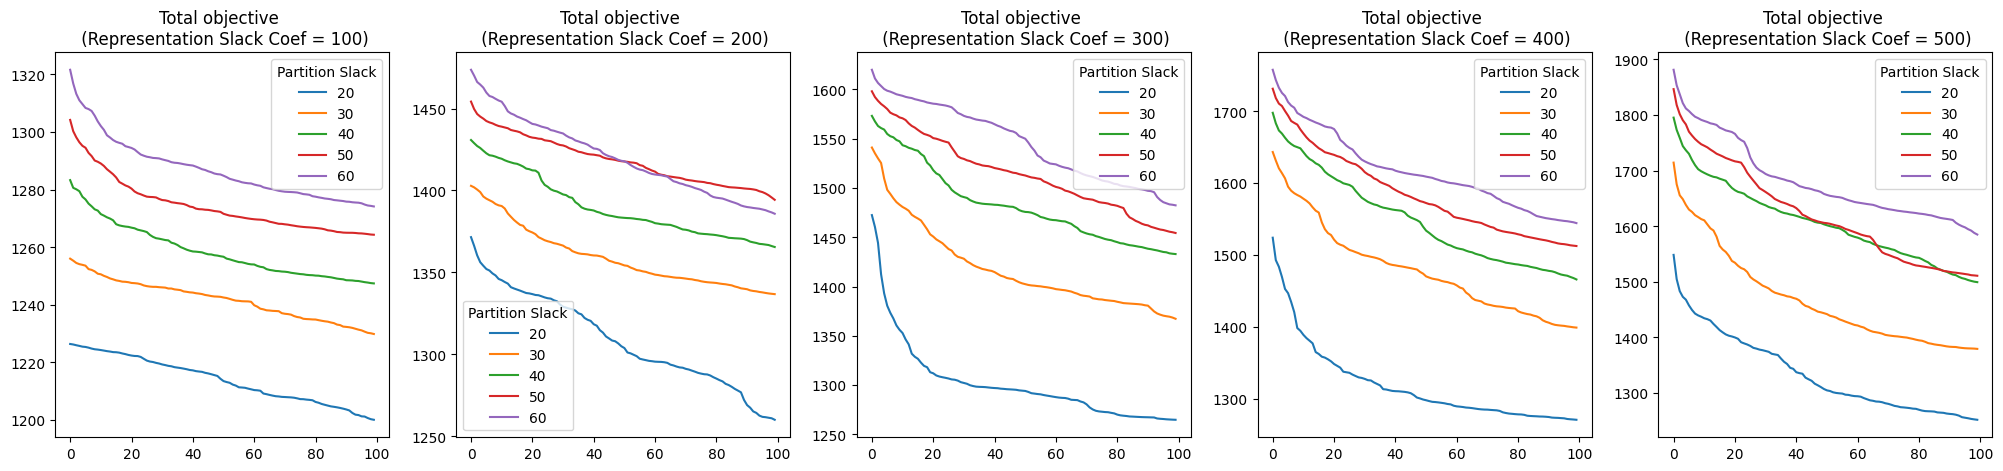

In [23]:
counter = 0
fig, ax = plt.subplots(1, 5, figsize=(25,5))
for i in range(100,600,100): # representation
    for j in range(20,70,10): # partition
        filename = "test9_slack11_recon2_"+str(j)+"_"+str(i)
        try:
            s1,s2,s3,s4 = decompose_objectives(filename,200,j,i)
        except:
            print(i,j)
            continue
        ax[counter].plot(s4, label=str(j))
    ax[counter].set_title("Total objective \n (Representation Slack Coef = " + str(i) + ")")
    ax[counter].legend(title = "Partition Slack")
    #ax[counter].set_ylim((800,1400))
    counter += 1

plt.show()

test9_slack11_recon_20_100
True
test9_slack11_recon_40_100
True
test9_slack11_recon_60_100
True
test9_slack11_recon_80_100
True


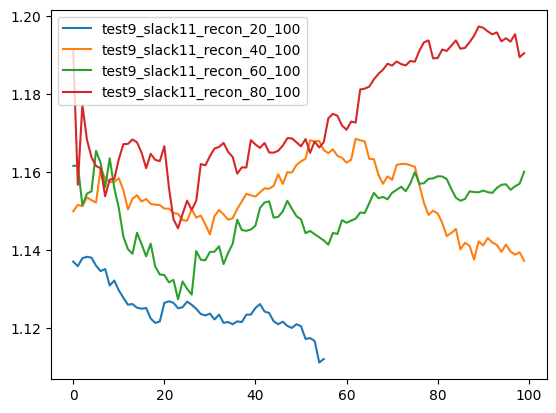

In [29]:
tests = ["test9_slack11_recon_20_100","test9_slack11_recon_40_100","test9_slack11_recon_60_100","test9_slack11_recon_80_100"]
part_coefs = [20,40,60,80]
rep_coefs = [100,100,100,100]
for i in range(len(tests)):
    s1,s2,s3 = decompose_objectives(tests[i],200,part_coefs[i],rep_coefs[i])
    plt.plot(s3,label=tests[i])
plt.legend()
plt.show()

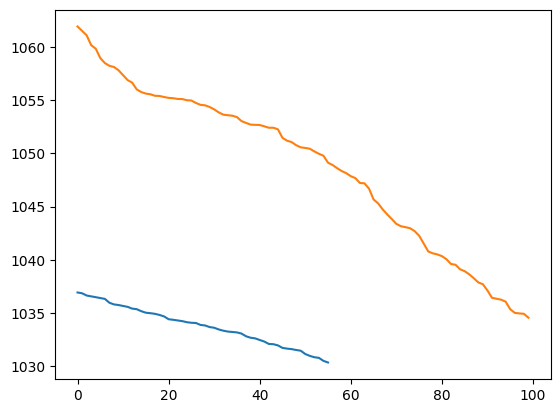

In [15]:
plt.plot(objectives20)
plt.plot(objectives40)

In [30]:
recon_model = gp.read("./model_write/" + "test7_recon_master" + "_out1.lp")
constrs_len = len(model.getConstrs())
print(constrs_len)
# clusters = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
# distances = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
recon_slacks = np.loadtxt("./model_matrix/"+"test7_recon"+"_slacks.txt")
recon_solutions = np.loadtxt("./model_matrix/"+"test7_recon"+"_solutions.txt")
# objectives = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
# new_centers = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
# new_centers = [(i[0],i[1]) for i in new_centers]

Read LP format model from file ./model_write/test7_recon_master_out1.lp
Reading time = 0.52 seconds
: 204 rows, 9587 columns, 794929 nonzeros
204


In [35]:
recon_solutions

array([0.     , 0.     , 0.00389, ..., 0.     , 0.     , 0.     ])

In [36]:
np.allclose(solutions[-1,:],recon_solutions)

True

Reoptimize the model using the Gurobi output of the master problem from the last iteration

In [23]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 204 rows, 9587 columns and 794929 nonzeros
Model fingerprint: 0x85c27925
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.33s
Presolved: 204 rows, 9587 columns, 794929 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.065e+04
 Factor NZ  : 2.091e+04 (roughly 4 MB of memory)
 Factor Ops : 2.851e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.20714748e+06  0.00000

In [14]:
sol_num = 999

In [15]:
objectives[sol_num], model.ObjVal

(786.1297149421915, 786.129714942192)

In [16]:
last_sol_gurobi = [var.X for var in model.getVars()]
last_sol_gurobi_Z = last_sol_gurobi[:K] + last_sol_gurobi[K + constrs_len-1:]
last_sol_gurobi_slackness = last_sol_gurobi[K:K + constrs_len-1]

In [17]:
np.allclose(last_sol_gurobi_Z, solutions[sol_num][:len(last_sol_gurobi_Z)], atol = 1e-5)

True

check partition constraints

In [33]:
valid = True
for j in range(0,1000,20):
    partition_constr = [clusters[:solutions[j].shape[0],i] @ solutions[j] + slacks[j][i] for i in range(n)]
    valid = valid and (np.allclose(np.array(partition_constr),np.ones(n),rtol=1e-3))

In [19]:
print(partition_constr)

[1.00003, 1.0000126872938488, 1.00002, 1.00001, 1.0000099999999998, 1.00001, 1.0000156330806393, 1.00001, 1.0000200000000001, 1.00001, 1.00002, 1.0000099999999998, 1.0000229354506225, 1.00001, 1.0000095743134358, 1.00001, 1.00003, 1.00001, 1.00002, 1.0, 1.00001, 1.00001, 1.00001, 1.0000225943539045, 1.00002, 1.00003, 1.00001, 1.00004, 1.00004, 1.0000499999999999, 1.0000300000000002, 1.0000399999999998, 1.00004, 1.00006, 1.0000499999999999, 1.00002, 1.00003, 1.00003, 1.0000499999999999, 1.0000399999999998, 1.0000399999999998, 1.0000099999999998, 1.0000300000000002, 1.00003, 1.00003, 1.0000499999999999, 1.0000499999999999, 1.0000200000000001, 1.0000499999999999, 1.00004, 1.00003, 1.00001, 1.00003, 1.00004, 1.00003, 1.00004, 1.0000299999999998, 1.0000299999999998, 1.00004, 1.00003, 1.0000200000000001, 1.0000200000000001, 1.0000393463136177, 1.00001, 1.0000399999999998, 1.00003, 1.00001, 1.0000200000000001, 1.00004, 1.0000106460588811, 1.0000200000000001, 1.00001, 1.00004, 1.00002999999999

In [20]:
print(valid)

True


In [22]:
cluster_sizes = [sum(c[:n]) for c in clusters]

In [34]:
partition_constr_columns = []
for j in range(1000):
    partition_constr_columns.append(cluster_sizes[:len(solutions[j])] @ solutions[j] + sum(slacks[j][:n]))
print(partition_constr_columns)

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0011733333334, 200.0011733333334, 199.99891, 199.9989767741936, 199.99926, 199.99863153846172, 199.99946294117655, 199.99964517241386, 200.00089727272737, 199.99943, 200.00077777777787, 199.99917228915666, 199.9994710112359, 200.0013503703704, 200.00071448430486, 200.00005324324326, 199.9986941025642, 199.99907588235288, 199.9980842857143, 200.00058559548683, 200.00319130434784, 200.0016850323974, 199.9976095758815, 199.999155104625, 199.9965794313528, 199.9985854018343, 199.99687333790263, 200.0007227046925, 199.9992692582563, 199.99860155121118, 199.99861249164476, 200.00151058593963, 199.9993611997037, 199.99962776423735, 199.998770866349, 199.99975468717236, 200.0010900460234, 199.9989761124637, 199.99904103212728, 199.99996057101487, 199.99911737477046, 200.00130943833176, 200.00096020455555, 199.9994211

In [41]:
np.allclose(partition_constr_columns, np.ones(1000) * 200, atol = 1e-2)

True

check number of clusters constraint

In [335]:
np.sum(solutions[500])

4.999969999999999

checks the cluster representation of t of the same as the t in the LP

In [338]:
m = solutions[500].shape[0]

In [339]:
t1 = []
t2 = []
for i in (range(m)):
    t_vector = []
    for j in range(l):
        cluster = clusters[i,:n]
        size = sum(cluster)
        group_size = cluster @ q[j]
        if group_size >= alpha * size:
            t_vector.append(1)
        else:
            t_vector.append(0)
    t1.append(t_vector)
    t2.append(clusters[i,n:n+l])

In [341]:
np.allclose(t1,t2,atol=1e-3)

True

check fairness constraint

In [357]:
groups = [[] for _ in range(l)]
slack_groups = [[] for _ in range(l)]
for sol_num in range(1000):   
    for i in range(n,n+l):
        groups[i-n].append(solutions[sol_num] @ clusters[:solutions[sol_num].shape[0],i] + slacks[sol_num][i])
        slack_groups[i-n].append(slacks[sol_num][i])

<function matplotlib.pyplot.show(close=None, block=None)>

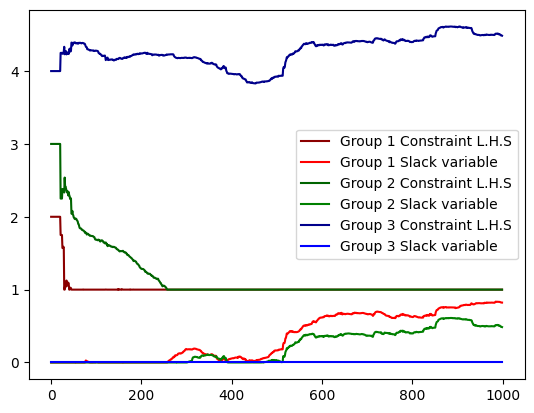

In [385]:
plt.plot(groups[0], c = "darkred", label = "Group 1 Constraint L.H.S")
plt.plot(slack_groups[0], c = "red", label = "Group 1 Slack variable")
plt.plot(groups[1], c = "darkgreen", label = "Group 2 Constraint L.H.S")
plt.plot(slack_groups[1], c = "green", label = "Group 2 Slack variable")
plt.plot(groups[2], c = "darkblue", label = "Group 3 Constraint L.H.S")
plt.plot(slack_groups[2], c = "blue", label = "Group 3 Slack variable")
plt.legend()
plt.show

compares the solutions from Gurobi's log file with the stored solutions

In [50]:
df = pd.read_csv("./tests/model_write/" + file_name + "_out501.sol", sep = " ")

In [51]:
last_solution_gurobi = df['Solution'][1:].to_numpy(dtype=float)

In [52]:
last_solution_gurobi_Z = np.concatenate((last_solution_gurobi[:K], last_solution_gurobi[K + constrs_len - 1:]))

In [53]:
last_solution_gurobi_slackness = last_solution_gurobi[K:K + constrs_len - 1]

In [54]:
np.allclose(last_solution_gurobi_slackness, slacks[500], atol = 1e-3)

True

In [55]:
np.allclose(last_solution_gurobi_Z, solutions[500][:last_solution_gurobi_Z.shape[0]], atol = 1e-3)

True

## Visualizations

In [107]:
file_name = "test11_1"
name_slack = file_name + "_slack"
recon = file_name + "_recon_last_200"
recon_slack = name_slack + "_recon_last_200"

obj1 = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
obj2 = np.loadtxt("./model_matrix/"+name_slack+"_objectives.txt")
obj3 = np.loadtxt("./model_matrix/"+recon+"_objectives.txt")
obj4 = np.loadtxt("./model_matrix/"+recon_slack+"_objectives.txt")

iters = len(obj2)

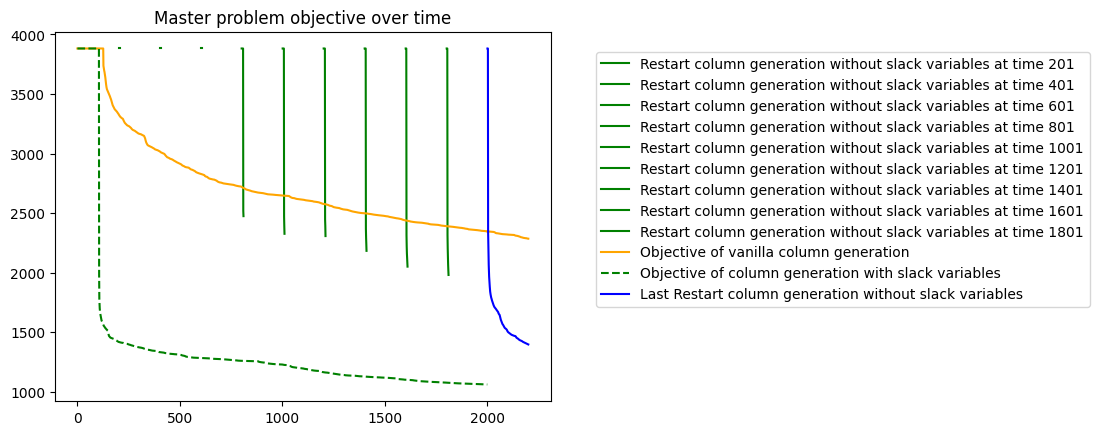

In [133]:
for sol_num in ["201","401","601","801","1001","1201","1401","1601","1801"]:
    recon_wake_up = name_slack + "_recon_"+ sol_num + "_10"
    obj = np.loadtxt("./model_matrix/"+recon_wake_up+"_objectives.txt")
    plt.plot(range(int(sol_num),int(sol_num)+10), obj, label= "Restart column generation without slack variables at time " + sol_num, c = 'green')

plt.plot(range(iters), obj1, label = "Objective of vanilla column generation", c = 'orange')
plt.plot(range(iters), obj2, label = "Objective of column generation with slack variables", linestyle='dashed', c = 'green')
plt.plot(range(iters,iters+200), obj3, c = 'orange')
plt.plot(range(iters,iters+200), obj4, label = "Last Restart column generation without slack variables", c = 'blue')
plt.legend(bbox_to_anchor = (2.1, 0.6), loc='center right')

plt.title("Master problem objective over time")
plt.show()

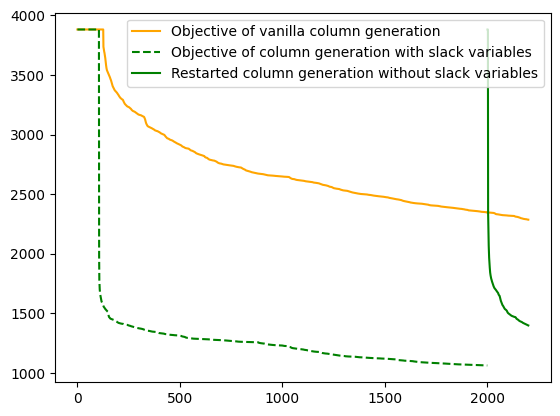

In [116]:
plt.plot(range(iters), obj1, label = "Objective of vanilla column generation", c = 'orange')
plt.plot(range(iters), obj2, label = "Objective of column generation with slack variables", linestyle='dashed', c = 'green')
plt.plot(range(iters,iters+200), obj3, c = 'orange')
plt.plot(range(iters,iters+200), obj4, label = "Restarted column generation without slack variables", c = 'green')
plt.legend()
plt.show()

In [134]:
file_name = "test13_1"
name_slack = file_name + "_slack"
recon_slack = name_slack + "_recon_1697_300"

obj1 = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
obj2 = np.loadtxt("./model_matrix/"+name_slack+"_objectives.txt")
#obj3 = np.loadtxt("./model_matrix/"+recon+"_objectives.txt")
obj4 = np.loadtxt("./model_matrix/"+recon_slack+"_objectives.txt")

iters = len(obj2)

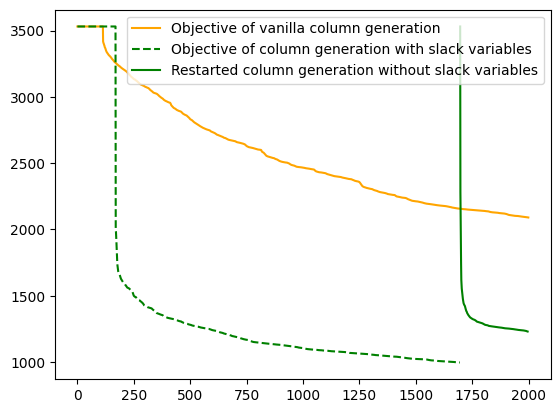

In [136]:
plt.plot(obj1, label = "Objective of vanilla column generation", c = 'orange')
plt.plot(obj2, label = "Objective of column generation with slack variables", linestyle='dashed', c = 'green')
#plt.plot(range(iters,iters+200), obj3, c = 'orange')
plt.plot(range(iters,iters+300), obj4, label = "Restarted column generation without slack variables", c = 'green')
plt.legend()
plt.show()

In [13]:
np.argmin(objectives)

1957

In [14]:
objectives[1957] = objectives[1956]

In [19]:
fairness_slacks[-1]

188.01750735951896

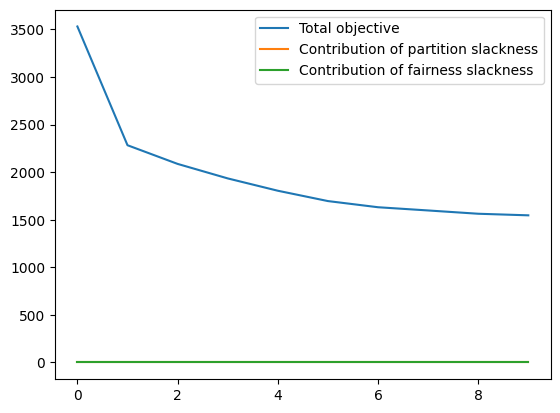

In [22]:
partition_slacks = [20 * sum(i[:n]) for i in slacks]
fairness_slacks = [100 * sum(i[n:]) for i in slacks]
plt.plot(objectives, label = "Total objective")
plt.plot(partition_slacks, label = "Contribution of partition slackness")
plt.plot(fairness_slacks, label = "Contribution of fairness slackness")
plt.legend()
plt.show()

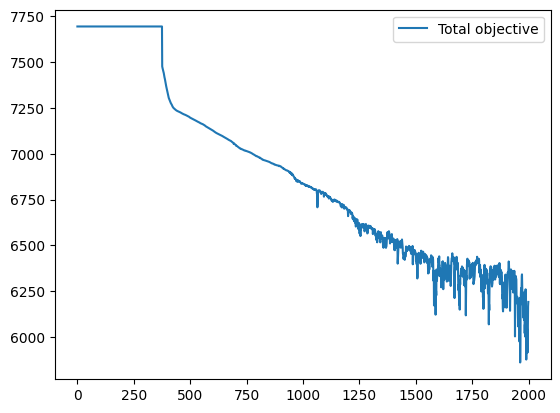

In [17]:
partition_slacks = [20 * sum(i[:n]) for i in slacks]
fairness_slacks = [100 * sum(i[n:]) for i in slacks]
plt.plot(objectives, label = "Total objective")
#plt.plot(partition_slacks, label = "Contribution of partition slackness")
#plt.plot(fairness_slacks, label = "Contribution of fairness slackness")
plt.legend()
plt.show()

In [37]:
cmap = sns.cm.rocket_r

In [15]:
fig = plt.figure(dpi = 1000)
sns.heatmap(solutions,cmap = cmap,vmax = 0.1)
fig.savefig("./tests/images/heatmap_"+ file_name +".png")
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: './tests/images/heatmap_test9_slack11.png'

Error in callback <function flush_figures at 0x0000015CFA770EE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [23]:
def create_df(solution):
    indices = list(range(len(solution)))
    indices_sorted = sorted(indices,key= lambda i : -solution[i])
    solutions_sorted = np.array(solution)[indices_sorted]
    fairness_rep = [tuple(c[n:n+l]) for c in clusters[indices_sorted]]
    df = pd.DataFrame({"Cluster Number": indices_sorted, 
                        "Solution": solutions_sorted,
                        "Cluster cost": np.array(distances)[indices_sorted], 
                        "Size of cluster": np.sum(np.array(clusters)[indices_sorted,:n],axis = 1),
                        "Fairness": fairness_rep})
    
    coverages,overlaps = coverage(list(df['Cluster Number']))
    df['coverage'] = coverages
    df['overlap'] = overlaps
    
    return df

In [24]:
def coverage(cluster_nums):
    cover = np.zeros(n)
    coverages = []
    overlaps = []
    for i in cluster_nums:
        cover += clusters[i][:n]
        coverage = 0
        overlap = 0
        for i in cover:
            if i > 0:
                coverage += 1
            if i > 1:
                overlap += i - 1
        coverages.append(coverage)
        overlaps.append(overlap)
    return coverages,overlaps

In [25]:
df = create_df(solutions[-1])

In [26]:
df[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,16,0.47136,11.867503,13.0,"(0.0, 1.0, 0.0, 0.0)",13,0.0
1,11,0.38287,148.917863,39.0,"(0.0, 0.0, 0.0, 0.0)",52,0.0
2,3467,0.33752,56.771223,23.0,"(1.0, 0.0, 0.0, 0.0)",75,0.0
3,6607,0.16834,101.154927,23.0,"(0.0, 1.0, 0.0, 0.0)",87,11.0
4,4816,0.16721,147.251536,27.0,"(0.0, 0.0, 1.0, 0.0)",105,20.0
5,2799,0.14124,64.622689,29.0,"(0.0, 1.0, 0.0, 0.0)",134,20.0
6,5676,0.13490,137.092177,27.0,"(1.0, 0.0, 0.0, 0.0)",140,41.0
7,2595,0.12483,137.800527,30.0,"(0.0, 0.0, 1.0, 0.0)",156,55.0
8,2277,0.10059,48.812905,19.0,"(0.0, 0.0, 1.0, 0.0)",158,72.0
9,5082,0.09887,112.213257,31.0,"(0.0, 0.0, 1.0, 0.0)",163,98.0


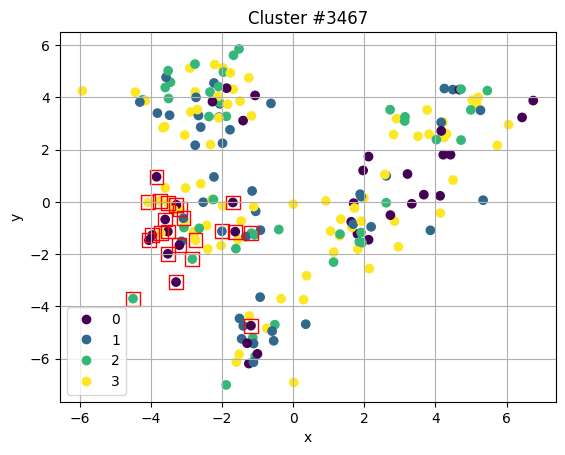

In [29]:
cluster_num = 3467
cluster_x = []
cluster_y = []
for i,j in enumerate(clusters[cluster_num][:n]):
    if j == 1:
        cluster_x.append(X[:,0][i])
        cluster_y.append(X[:,1][i])

scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.scatter(cluster_x,cluster_y,marker="s",edgecolors="r",facecolors='none',s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster #' + str(cluster_num))
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3])
plt.show()

1. lower bound , reduced costs, of pricing problem evolve over iterations
2. number of points in the cluster
3. fix a cluster and then move to a smaller problem, for all other clusters, change corresponding rows to 0 but keep the rest
4. cluster generation after bumping penalty to 1000

## Parameters

In [22]:
Zvars = model.getVars()[:K] + model.getVars()[K + constrs_len-1:]
Slack_vars_partition = model.getVars()[K : K + n]
Slack_vars_represent = model.getVars()[K + n : K + n + l]

In [23]:
len(Zvars) + len(Slack_vars_partition) + len(Slack_vars_represent) == len(model.getVars())

True

In [119]:
model.Params.LogToConsole = 0

In [120]:
tracker = []
for a in tqdm(range(500,10000,1000)):
    for b in range(500,3500,300):
        objective = gp.quicksum(Zvars[i] * dist_gurobi[i] for i in range(len(Zvars))) + \
            gp.quicksum(i * a for i in Slack_vars_partition) + \
            gp.quicksum(i * b for i in Slack_vars_represent)
        model.setObjective(objective, GRB.MINIMIZE)
        model.optimize()
        tracker.append((a,b,[var.X for var in Slack_vars_represent],sum(var.X for var in Slack_vars_partition),model.ObjVal))
        

100%|██████████| 10/10 [00:27<00:00,  2.74s/it]


In [96]:
round(2189.108614689968 /1000,3)

2.189

In [126]:
# Generate column names: 500, 1500, 2500, ..., 49500
row_names = list(range(500, 10000, 1000))

# Generate row names: 500, 1500, 2500, ..., 49500
col_names = list(range(500,3500,300))

# Initialize a 100 * 100 pandas DataFrame with the specified column and row names
df = pd.DataFrame(index=row_names, columns=col_names,dtype=float)

for i in tracker:
    a,b,repre,part,obj = i
    #print(round(obj/100,3))
    df.loc[a,b] = round(sum(repre),3)

vanilla no slack
vanilla pernalty version (parameters 30, 300)
1000 increase the penalties version 

For each version, at iteration 2000, solve without slacks
Turn the variables iteration

one slack change
change the penalties twice

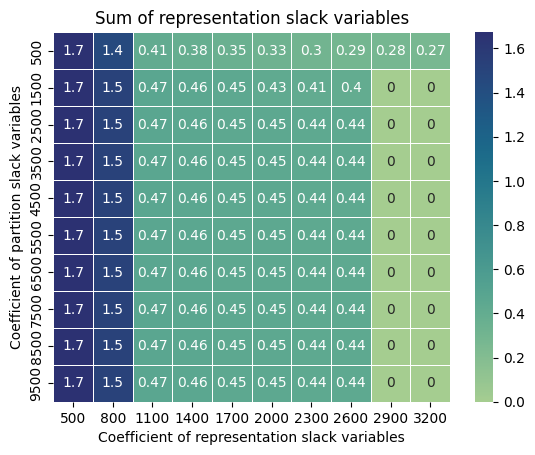

In [127]:
sns.heatmap(df,annot=True, cmap="crest", linewidth=.5)
plt.title("Sum of representation slack variables")
plt.xlabel("Coefficient of representation slack variables")
plt.ylabel("Coefficient of partition slack variables")
plt.show()

In [36]:
model.objVal

2342.624198332194

In [33]:
[var.X for var in Slack_vars_represent]

[0.0, 0.0, 0.0011018735866433413, 0.0]

In [30]:
[var.X for var in Slack_vars_represent]

[0.0, 0.0, 0.0011018735866401702, 0.0]

In [34]:
sum(var.X for var in Slack_vars_partition) == 0, sum(var.X for var in Slack_vars_represent) == 0

(True, False)

In [50]:
solution_no_slack = np.array([z.X for z in Zvars])

In [51]:
np.allclose(np.ones(n),[clusters[:len(solution_no_slack),i] @ solution_no_slack for i in range(n)])

True

In [52]:
for i in range(n,n+l):
    print(solution_no_slack @ clusters[:solution_no_slack.shape[0],i])

0.6564064160107506
0.921026962163354
0.7800078559154431
0.9999999999999996


In [53]:
df2 = create_df(solution_no_slack)

In [54]:
df2[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,4163,0.189640,159.038550,29.0,"(1.0, 0.0, 0.0, 0.0)",29,0.0
1,3615,0.180044,70.031531,19.0,"(0.0, 1.0, 0.0, 0.0)",48,0.0
2,6369,0.179091,133.509311,25.0,"(0.0, 1.0, 0.0, 0.0)",59,14.0
3,6077,0.162776,145.355557,25.0,"(0.0, 1.0, 0.0, 0.0)",70,28.0
4,5322,0.135440,159.804863,31.0,"(1.0, 0.0, 0.0, 0.0)",82,47.0
5,6905,0.095919,116.120535,21.0,"(0.0, 1.0, 0.0, 0.0)",92,58.0
6,4963,0.094557,150.103961,49.0,"(0.0, 0.0, 0.0, 0.0)",140,59.0
7,5986,0.093172,164.817422,47.0,"(0.0, 0.0, 0.0, 1.0)",174,72.0
8,5037,0.089828,227.236466,46.0,"(0.0, 0.0, 0.0, 0.0)",178,114.0
9,2582,0.087002,189.717541,33.0,"(0.0, 0.0, 1.0, 0.0)",184,141.0


In [284]:
c2 = [var.obj for var in model.getVars()]
c2 == c

In [76]:
def get_nonzeros(l):
    res = []
    for i,j in enumerate(l):
        if j != 0:
            res.append(i)
    #print(l)
    print(res)